### Variables categoricas ordinales

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')

In [3]:
data

,Escolaridad,No. de hijos
0,Primaria trunca,9
1,Secundaria,3
2,Preparatoria,2
3,Sin escolaridad,3
4,Primaria,2
...,...,...
5055,Secundaria,1
5056,Preparatoria,3
5057,Primaria,1
5058,Secundaria,3


1. Sustituya los datos de la variable categórica por los coeficientes de un polinomio lineal cuya suma sea cero.

In [5]:
cat=data['Escolaridad'].unique()
cat

array(['Primaria trunca', 'Secundaria', 'Preparatoria', 'Sin escolaridad',
       'Primaria'], dtype=object)

In [8]:
Ord= [cat[3],cat[0],cat[4],cat[1],cat[2],]
Ord

['Sin escolaridad',
 'Primaria trunca',
 'Primaria',
 'Secundaria',
 'Preparatoria']

In [76]:
n=len(Ord)
m=n-1 if n%2==0 else int((n-1)/2)
st=2 if n%2==0 else 1
x=range(-m,m+1,st)

In [15]:
# Codificación de un polinomio de grado 1
a0=0
a1=1
Linesc={k:a0+a1*i for k,i in zip(Ord,x)}
Linesc

{'Sin escolaridad': -2,
 'Primaria trunca': -1,
 'Primaria': 0,
 'Secundaria': 1,
 'Preparatoria': 2}

In [18]:
dfC=data.copy()
dfC['Linesc']=data['Escolaridad'].map(Linesc)
dfC

,Escolaridad,No. de hijos,Linesc
0,Primaria trunca,9,-1
1,Secundaria,3,1
2,Preparatoria,2,2
3,Sin escolaridad,3,-2
4,Primaria,2,0
...,...,...,...
5055,Secundaria,1,1
5056,Preparatoria,3,2
5057,Primaria,1,0
5058,Secundaria,3,1


2. Muestre en un gráfico la escolaridad contra el número de hijos usando la función *scatter* de *matplotlib.pyplot*.

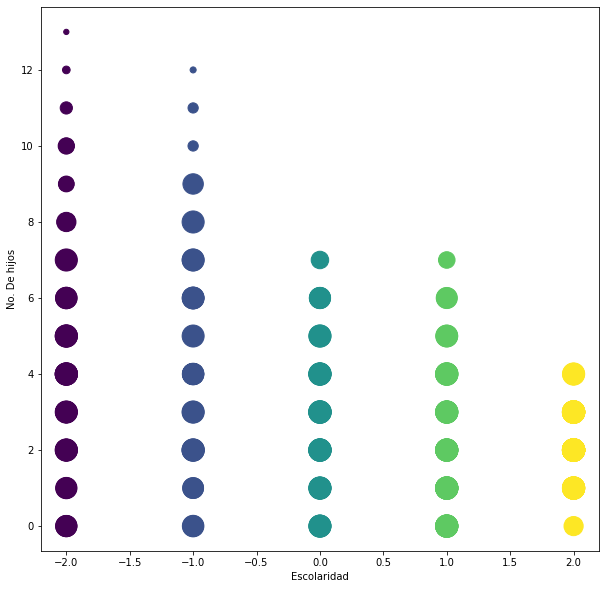

In [75]:
import matplotlib.pyplot as plt
import numpy as np

X= dfC['Linesc']
Y= dfC['No. de hijos']
area= 500*np.random.rand(len(Y))**2
plt.figure(figsize=(10,10))
plt.xlabel('Escolaridad')
plt.ylabel('No. De hijos')
plt.scatter(X,Y,s=area,c=x)
plt.show()

3. Sustituya ahora la variable categórica por los coeficientes de un polinomio cuadrático cuya suma sea cero.

In [85]:
a1=0
a2=1 # Convexa
a0=-np.sum([i**2 for i in x])*a2/n
Cuadesc={k:a0+a1*i+a2*i**2 for k,i in zip(Ord,x)}
Cuadesc


{'Sin escolaridad': 2.0,
 'Primaria trunca': -1.0,
 'Primaria': -2.0,
 'Secundaria': -1.0,
 'Preparatoria': 2.0}

In [91]:
dfD=dfC.copy()
dfD['Cuadesc']=data['Escolaridad'].map(Cuadesc)
dfD

,Escolaridad,No. de hijos,Linesc,Cuadesc
0,Primaria trunca,9,-1,-1.0
1,Secundaria,3,1,-1.0
2,Preparatoria,2,2,2.0
3,Sin escolaridad,3,-2,2.0
4,Primaria,2,0,-2.0
...,...,...,...,...
5055,Secundaria,1,1,-1.0
5056,Preparatoria,3,2,2.0
5057,Primaria,1,0,-2.0
5058,Secundaria,3,1,-1.0


4. Obtenga una relación lineal usando la clase *LinearRegression* del paquete *sklearn.linear_model*, para la $X=\{Escolaridad\_1, Escolaridad\_2\}$ y $Y=No.de\_hijos$.

Donde $Escolaridad\_1$ es la codificación con coeficientes de grado uno y $Escolaridad\_2$ es la codificación con los coeficientes de grado dos.

In [94]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
x0=(dfD[['Linesc','Cuadesc']])
y0=dfD['No. de hijos']
lr.fit(x0,y0)

LinearRegression()

In [117]:
lr.coef_
lr.intercept_
print(lr.coef_,lr.intercept_)

[-0.52033782  0.07985348] 3.026518882665692


5. Realice dos gráficas de la relación obtenida:
$$y=coef\_[0]*Escolaridad\_1+intercept\_$$
y
$$y=coef\_[1]*Escolaridad\_2+intercept\_$$

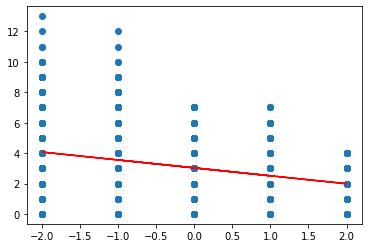

In [122]:
plt.scatter(dfD['Linesc'],y0)
f=lr.coef_[0]*dfD['Linesc']+lr.intercept_
plt.plot(dfD['Linesc'],f,'r')

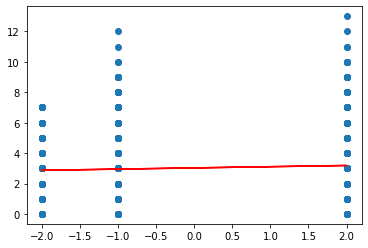

In [124]:
plt.scatter(dfD['Cuadesc'],y0)
f0=lr.coef_[1]*dfD['Cuadesc']+lr.intercept_
plt.plot(dfD['Cuadesc'],f0,'r')